# **Introdução**

Análise pré exploratória e formatação do banco de dados das Coberturas Vacinais por Imuno, segundo Unidade da Federação, do período de 2009 à 2029, extraído do DATASUS no TabNet [1](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def). 

Para compreendermos os dados que serão analisados, iremos levar em consideração o método utilizado para emissão do relatório de coberturas vacinais por tipo e grupos de vacinas com formulações diferentes contra a mesma doença. Para isso, iremos recorrer ao arquivo de Cobeturas Vacinais, disponibilizados no DATASUS [2](http://tabnet.datasus.gov.br/cgi/pni/notatecnicaCobertura.pdf), no decorrer desta análise.

# **Importação de bibliotecas e formatações**

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [ ]:
# Setting charts style
sns.set()

# **Funções**

In [ ]:
def new_df(dados):

    '''
    Função que recebe um conjunto de dados em forma de csv para:
        
        - simplificar a coluna 'Unidade da Federação' em 'UF';
        - criar uma coluna indicando a região da UF;
        - eliminar os números dos nomes dos estados;
        - eliminar a coluna total;
        - substituir espaços vazios por '0' no df;
        
    Variável:
        dados: dataframe com a base de dados coletados do datasus. Ex.: pd.read_csv()
    '''

    # Colocando zeros no lugar das células sem valor
    dados.fillna(0, inplace=True)

    # Eliminando a coluna Total 
    dados = dados.drop('Total', axis=1)

    # Eliminando os números dos imunos
    new = dados.T
    new.index = [idx[4:] for idx in new.index]
    dados = new.T

    # Simplificando 'Unidade da Federação' para 'UF' 
    dados = dados.rename(columns={'ade da Federação':'uf'})

    # Criando a coluna da região de cada estado ao lado de 'uf'
    regiao_br = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul','5':'Centro-Oeste'}
    dados['regiao'] = [regiao_br[idx[0]] for idx in dados['uf']]
    dados = dados[np.roll(dados.columns,1)]

    # Eliminando os números da coluna UF
    dados['uf'] = [idx[3:] for idx in dados['uf']]

    # Transformando 'uf' em index
    dados = dados.set_index('uf')

    dados.fillna(0, inplace=True)

    return dados

# **Importando DataFrame**

Coberturas Vacinais por Imuno segundo Unidade da Federação do período de 2009 à 2029

In [ ]:
link_dados = 'https://github.com/SaraZachi/programa-de-imuno-nacional/blob/main/Dados/Imunos%202009-2019.csv?raw=true'
df_imuno = pd.read_csv(link_dados,encoding = 'ISO-8859-1',
                    skiprows = 3, sep=';',skipfooter=20,
                    thousands = ".", decimal =',')
df_imuno.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,11 Rondônia,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,0.03,98.66,69.82,86.41,88.72,80.30,104.18,83.98,73.95,100.48,3.84,79.65,53.88,39.87,86.24
1,12 Acre,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,1.87,75.29,47.95,58.36,61.40,61.16,87.88,54.17,48.82,79.76,4.94,60.67,28.64,20.42,66.04
2,13 Amazonas,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,0.18,82.42,61.01,74.57,77.86,71.68,93.20,69.89,62.40,85.21,4.17,67.25,47.39,40.24,74.76
3,14 Roraima,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,0.40,83.36,66.25,78.17,81.25,80.99,92.44,75.17,70.88,87.32,5.31,77.28,44.48,41.19,78.37
4,15 Pará,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,0.03,76.23,47.04,61.69,64.88,57.58,89.89,51.81,45.06,78.37,3.29,57.81,29.93,20.42,64.43


# **Explorando e Limpando o Dataframe**

In [ ]:
# Descobrindo as células vazias
np.where(pd.isnull(df_imuno))
# [dados.iloc[i,j] for i,j in zip(*np.where(pd.isnull(dados)))]

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df_imuno = new_df(df_imuno)
df_imuno.head()

,regiao,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante
uf,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,0.03,98.66,69.82,86.41,88.72,80.30,104.18,83.98,73.95,100.48,3.84,79.65,53.88,39.87
Acre,Norte,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,1.87,75.29,47.95,58.36,61.40,61.16,87.88,54.17,48.82,79.76,4.94,60.67,28.64,20.42
Amazonas,Norte,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,0.18,82.42,61.01,74.57,77.86,71.68,93.20,69.89,62.40,85.21,4.17,67.25,47.39,40.24
Roraima,Norte,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,0.40,83.36,66.25,78.17,81.25,80.99,92.44,75.17,70.88,87.32,5.31,77.28,44.48,41.19
Pará,Norte,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,0.03,76.23,47.04,61.69,64.88,57.58,89.89,51.81,45.06,78.37,3.29,57.81,29.93,20.42


Repare que há mais de uma coluna para uma mesma vacina, e.g. a da Poliomielite. Analisando as notas sobre o banco de dados das Coberturas Vacinais disponibilizadas pelo DATASUS [2], compreendemos que a Cobertura Vacinal (CV) da Poliomielite registrada refere-se a soma das doses aplicadas das vacinas com o mesmo componente em menores de 1 ano. No entanto, a existência das três colunas ('Poliomielite', 'Poliomielite 4 anos' e 'Poliomielite(1º ref)') não foi esclarecida, portando deixaremos estas colunas de lado para nossa análise.

In [ ]:
# Verificando se ficou alguma célula vazia
df_imuno.isna().sum().sum()

0

In [ ]:
# Imprimindo algumas informações estatísticas do df
infos_df = df_imuno.describe()
infos_df = infos_df.T
infos_df

,count,mean,std,min,25%,50%,75%,max
BCG,27.0,100.572963,4.496955,92.00,96.835,101.04,103.590,108.15
Hepatite B em crianças até 30 dias,27.0,70.824074,7.777421,60.09,65.595,70.34,74.555,92.93
Rotavírus Humano,27.0,84.287778,7.364125,70.29,78.680,86.41,89.390,96.01
Meningococo C,27.0,79.158148,6.987630,65.26,75.000,78.98,83.095,96.57
Hepatite B,27.0,92.148148,5.994048,80.49,87.715,92.69,96.915,101.21
Penta,27.0,77.426667,7.335957,60.53,72.180,78.84,81.445,91.44
Pneumocócica,27.0,79.928148,8.812350,60.49,74.070,81.51,86.250,93.78
Poliomielite,27.0,91.023333,5.157165,79.95,87.085,91.13,93.510,101.02
Poliomielite 4 anos,27.0,0.825556,2.039456,0.03,0.130,0.35,0.610,10.81
Febre Amarela,27.0,53.846667,37.216947,0.30,13.995,75.07,83.870,98.66


In [ ]:
# Ordenando por ordem de grandeza o valor 'mean' (média do número de vacinas aplicadas)
infos_df = infos_df.sort_values('mean', ascending=False)
infos_df.head()

,count,mean,std,min,25%,50%,75%,max
BCG,27.0,100.572963,4.496955,92.00,96.835,101.04,103.590,108.15
Tríplice Viral D1,27.0,95.769630,4.998387,87.88,92.335,95.64,98.485,107.66
Hepatite B,27.0,92.148148,5.994048,80.49,87.715,92.69,96.915,101.21
Poliomielite,27.0,91.023333,5.157165,79.95,87.085,91.13,93.510,101.02
DTP,27.0,89.937778,5.698378,78.37,86.400,90.71,93.270,101.12


In [ ]:
# Salvando o df no diretório como csv
df_imuno.to_csv(r"df_imunos.csv")

# **Visualizando os dados**

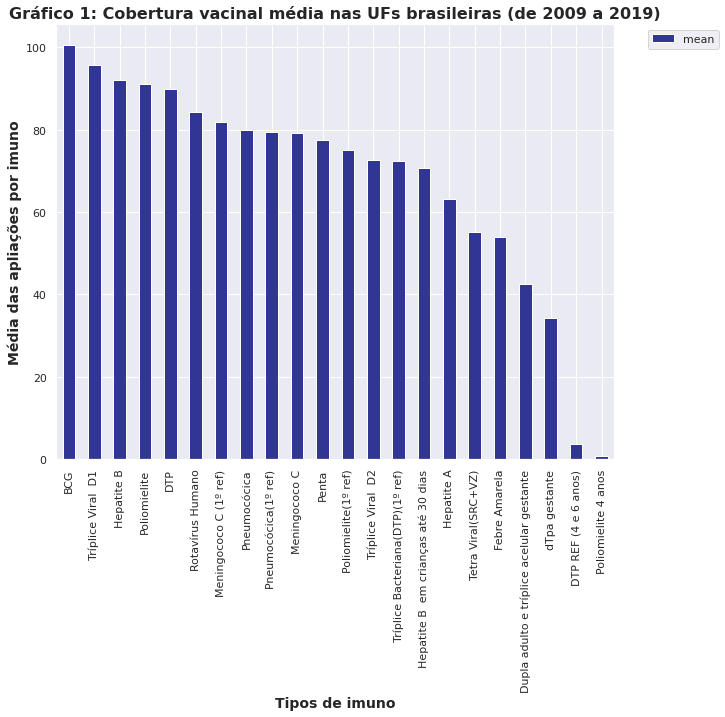

In [ ]:
infos_df['mean'].plot(kind='bar', figsize=(10,8), cmap=plt.get_cmap('RdYlBu_r'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.title('Gráfico 1: Cobertura vacinal média nas UFs brasileiras (de 2009 a 2019)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Tipos de imuno', fontsize = 14, fontweight = 'bold')
plt.ylabel('Média das apliações por imuno', fontsize = 14, fontweight = 'bold')

plt.show()

No gráfico acima (gráfico 1) pode parecer que as 5 vacinas mais aplicadas na população das Unidades Federativas Brasileiras são: BCG, Tríplice Viral D1, Hepatite B, Poliomielite e DTP. No entanto, pada cocluir isto de fato, é preciso realizar mais alguns testes com esses dados.

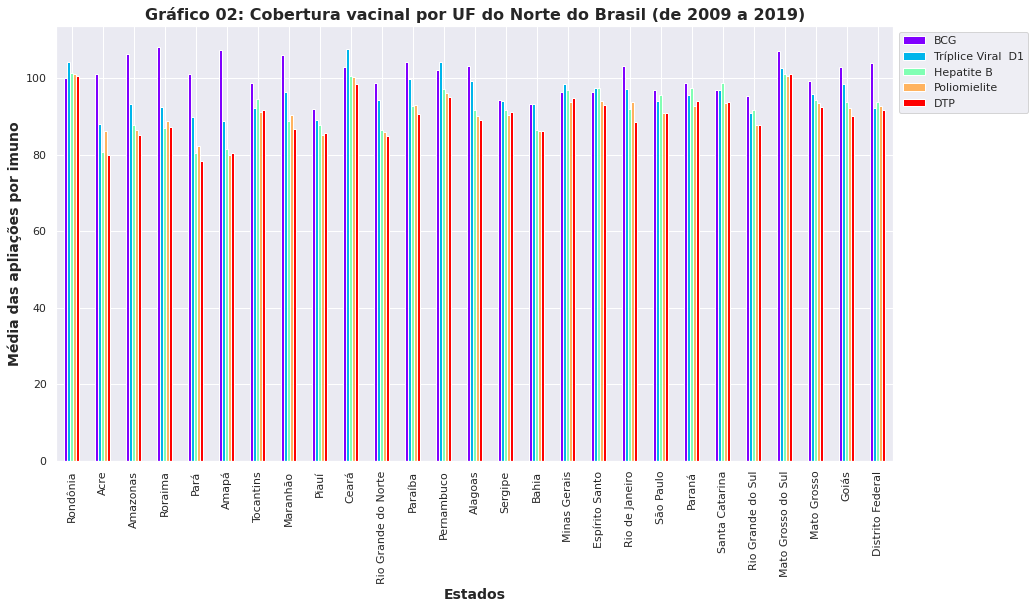

In [ ]:
df_imuno[['BCG', 'Tríplice Viral  D1', 'Hepatite B', 'Poliomielite', 'DTP']].plot(kind='bar', figsize=(15,8), cmap=plt.get_cmap('rainbow'))
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.title('Gráfico 02: Cobertura vacinal por UF do Norte do Brasil (de 2009 a 2019)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Estados', fontsize = 14, fontweight = 'bold')
plt.ylabel('Média das apliações por imuno', fontsize = 14, fontweight = 'bold')

plt.show()

Já neste segundo gráfico (Gráfico 2), perceba que a ordem de grandeza das aplicações por estado varia. 
a) BCG: CV em menores de 1 ano de idade, considerando a soma das doses
aplicadas (DU) de rotina e em comunicantes de hanseníase; 

# **Referências**

1. http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def
2. https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf
3. http://tabnet.datasus.gov.br/cgi/pni/notatecnicaCobertura.pdf